# Identitas

**Nama:** Cakra Wangsa M.A.W

**Kelas:** TI 3G

**NIM:** 2341720032

**No. Absen:** 8

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [3]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [4]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [5]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [6]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Data Size
df.shape

(48842, 15)

In [8]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [9]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.shape

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [11]:
null_data = df.isnull().sum()

null_data = null_data[null_data > 0]

missing_list = [f"{col} ({val})" for col, val in zip(null_data.index, null_data.values)]

missing_str = ", ".join(missing_list)

print(f"2. Variabel yang memiliki nilai hilang: {missing_str}. "
      f"Total keseluruhan missing value: {null_data.sum()}")

2. Variabel yang memiliki nilai hilang: workclass (963), occupation (966), native-country (274). Total keseluruhan missing value: 2203


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [12]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

for col in ['workclass', 'occupation', 'native-country']:
  df[col].fillna(df[col].mode()[0], inplace=True)

print("Jumlah data hilang setelah imputasi:", df.isnull().sum().sum())
print(df.isnull().sum())

Jumlah data hilang setelah imputasi: 0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


C:\Users\cakra\AppData\Local\Temp\ipykernel_31020\2347741266.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


semua data tidak ada yang memiiliki nilai kosong, sehingga output menampilkan nilai 0

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [13]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Kolom kualitatif yang diperiksa:", list(non_numeric_cols), "\n")

before_norm = {col: sorted(df[col].unique()) for col in non_numeric_cols}

for col in non_numeric_cols:
    df[col] = df[col].astype(str).str.strip().str.title()
    df[col] = df[col].replace("?", "Others")

after_norm = {col: sorted(df[col].unique()) for col in non_numeric_cols}

summary_data = []
for col in non_numeric_cols:
    summary_data.append({
        "Kolom": col,
        "Jumlah Kategori Sebelum": len(before_norm[col]),
        "Kategori Sebelum": before_norm[col],
        "Jumlah Kategori Sesudah": len(after_norm[col]),
        "Kategori Sesudah": after_norm[col]
    })

summary_df = pd.DataFrame(summary_data)

print("=== Nilai Kualitatif ===")
display(summary_df)

invalid_rows = df[df[non_numeric_cols].isin(["?"]).any(axis=1)]
print("\nJumlah baris dengan nilai tidak sesuai setelah perbaikan:", len(invalid_rows))

print("\n=== data setelah perbaikan ===")
display(df.head())

Kolom kualitatif yang diperiksa: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'] 

=== Nilai Kualitatif ===


,Kolom,Jumlah Kategori Sebelum,Kategori Sebelum,Jumlah Kategori Sesudah,Kategori Sesudah
0,workclass,9,"[?, Federal-gov, Local-gov, Never-worked, Priv...",9,"[Federal-Gov, Local-Gov, Never-Worked, Others,..."
1,education,16,"[10th, 11th, 12th, 1st-4th, 5th-6th, 7th-8th, ...",16,"[10Th, 11Th, 12Th, 1St-4Th, 5Th-6Th, 7Th-8Th, ..."
2,marital-status,7,"[Divorced, Married-AF-spouse, Married-civ-spou...",7,"[Divorced, Married-Af-Spouse, Married-Civ-Spou..."
3,occupation,15,"[?, Adm-clerical, Armed-Forces, Craft-repair, ...",15,"[Adm-Clerical, Armed-Forces, Craft-Repair, Exe..."
4,relationship,6,"[Husband, Not-in-family, Other-relative, Own-c...",6,"[Husband, Not-In-Family, Other-Relative, Own-C..."
5,race,5,"[Amer-Indian-Eskimo, Asian-Pac-Islander, Black...",5,"[Amer-Indian-Eskimo, Asian-Pac-Islander, Black..."
6,sex,2,"[Female, Male]",2,"[Female, Male]"
7,native-country,42,"[?, Cambodia, Canada, China, Columbia, Cuba, D...",42,"[Cambodia, Canada, China, Columbia, Cuba, Domi..."
8,income,4,"[<=50K, <=50K., >50K, >50K.]",4,"[<=50K, <=50K., >50K, >50K.]"



Jumlah baris dengan nilai tidak sesuai setelah perbaikan: 0

=== data setelah perbaikan ===


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-Gov,77516,Bachelors,13,Never-Married,Adm-Clerical,Not-In-Family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-Emp-Not-Inc,83311,Bachelors,13,Married-Civ-Spouse,Exec-Managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,Hs-Grad,9,Divorced,Handlers-Cleaners,Not-In-Family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11Th,7,Married-Civ-Spouse,Handlers-Cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-Civ-Spouse,Prof-Specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

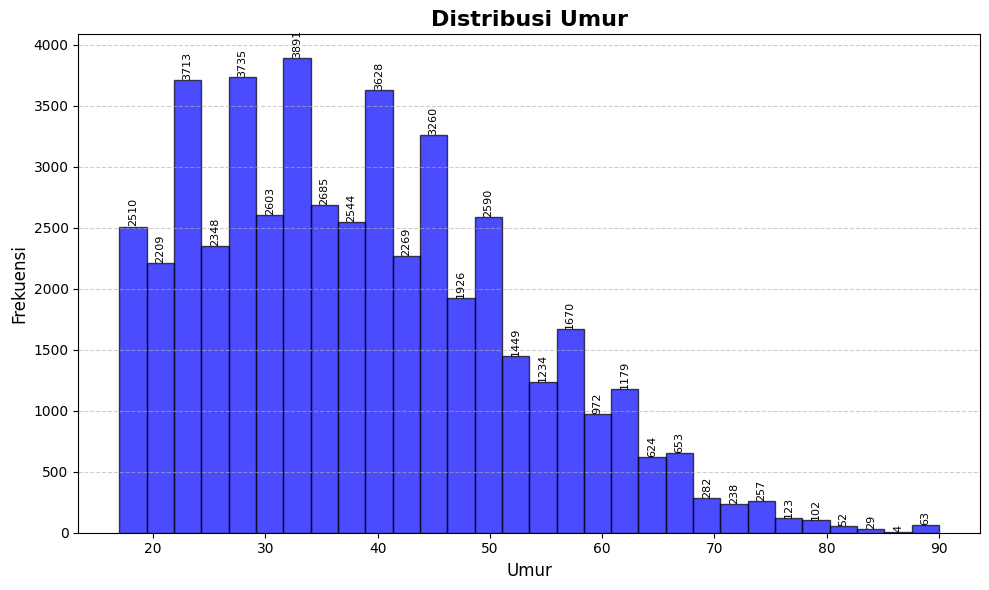

In [14]:
# Jawab 1.1 - Histogram
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(df['age'], bins=30, color='Blue', alpha=0.7, edgecolor='black')

plt.title('Distribusi Umur', fontsize=16, fontweight='bold')
plt.xlabel('Umur', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

[plt.text(b + (bins[1]-bins[0])/2, c + 0.5, str(int(c)),
          ha='center', va='bottom', fontsize=8, rotation=90)
 for c, b in zip(n, bins) if c > 0]

plt.tight_layout()
plt.show()

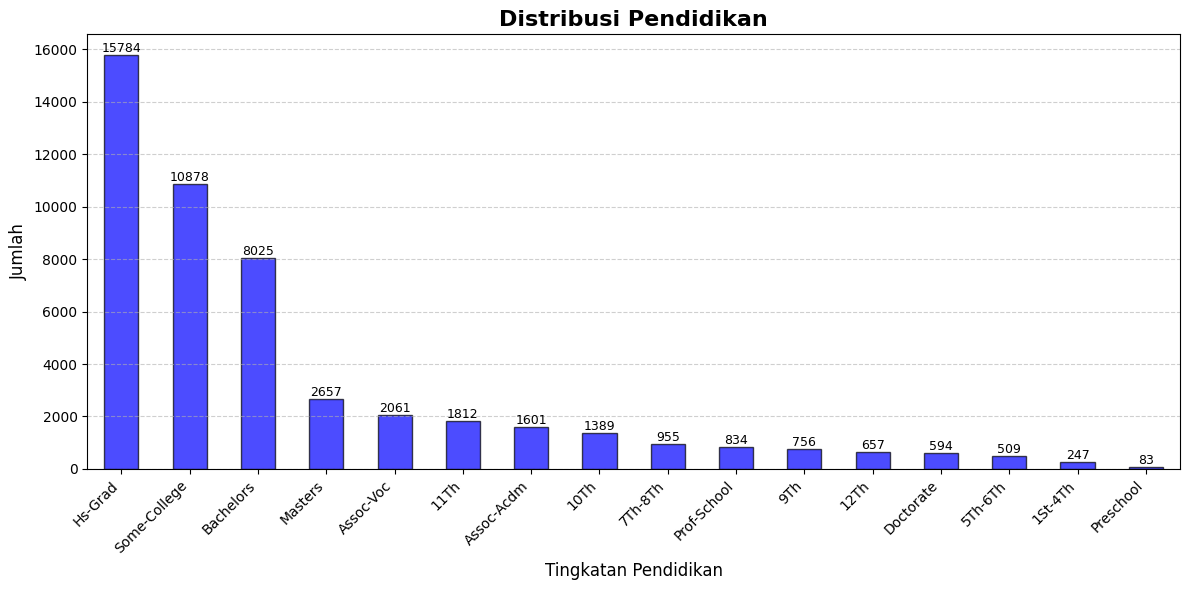

In [15]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(12, 6))
education_counts = df['education'].value_counts()
ax = education_counts.plot(kind='bar', color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribusi Pendidikan', fontsize=16, fontweight='bold')
plt.xlabel('Tingkatan Pendidikan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\cakra\AppData\Local\Temp\ipykernel_31020\1080401757.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(hours_data, labels=income_categories)


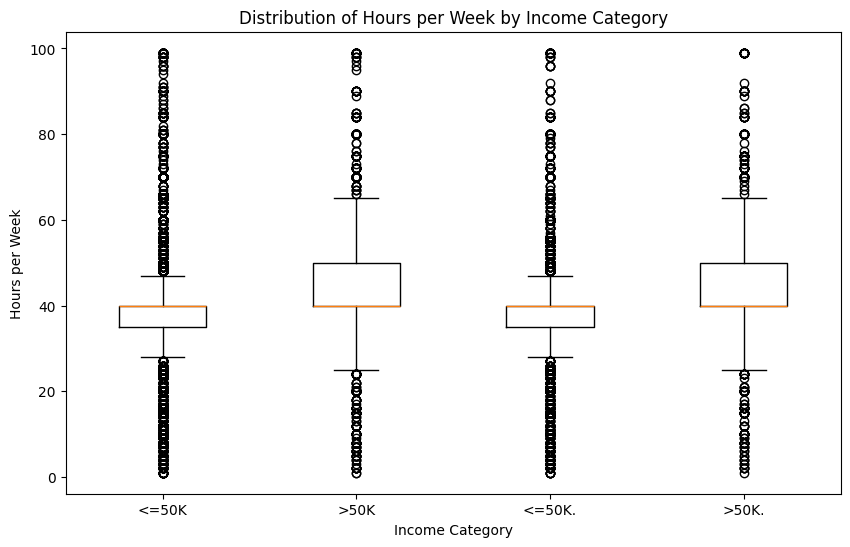

In [16]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(10, 6))
income_categories = df['income'].unique()
hours_data = [df[df['income'] == cat]['hours-per-week'] for cat in income_categories]

plt.boxplot(hours_data, labels=income_categories)
plt.title('Distribution of Hours per Week by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Hours per Week')
plt.show()

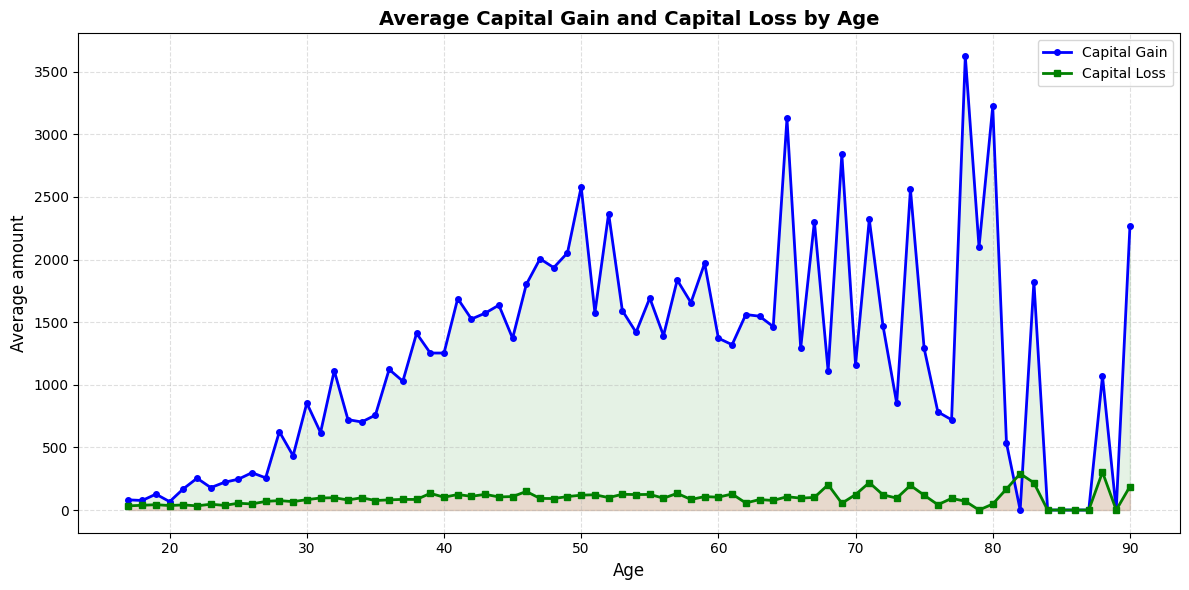

In [17]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(12, 6))
age_grouped = df.groupby('age').agg({
    'capital-gain': 'mean',
    'capital-loss': 'mean'
}).reset_index()

plt.plot(age_grouped['age'], age_grouped['capital-gain'],
         label='Capital Gain', color='blue', linewidth=2,
         marker='o', markersize=4)
plt.plot(age_grouped['age'], age_grouped['capital-loss'],
         label='Capital Loss', color='green', linewidth=2,
         marker='s', markersize=4)

plt.fill_between(age_grouped['age'], age_grouped['capital-gain'], color='green', alpha=0.1)
plt.fill_between(age_grouped['age'], age_grouped['capital-loss'], color='red', alpha=0.1)
plt.title('Average Capital Gain and Capital Loss by Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average amount', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [18]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [19]:
df['capital-loss'].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [32]:
outlier_df = pd.DataFrame([
    {
        "Income Category": cat,
        "Total Count": (n := len(subset := df.loc[df['income'] == cat, 'hours-per-week'])),
        "Q1": (Q1 := subset.quantile(0.25)),
        "Q3": (Q3 := subset.quantile(0.75)),
        "IQR": (IQR := Q3 - Q1),
        "Lower Bound": (lb := Q1 - 1.5 * IQR),
        "Upper Bound": (ub := Q3 + 1.5 * IQR),
        "Outlier Count": (o := subset[(subset < lb) | (subset > ub)]).size,
        "Outlier Percentage": o.size / n * 100
    }
    for cat in df['income'].unique()
])

outlier_df

,Income Category,Total Count,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count,Outlier Percentage
0,0,24720,35.0,40.0,5.0,27.5,47.5,7809,31.589806
1,2,7841,40.0,50.0,10.0,25.0,65.0,510,6.504272
2,1,12435,35.0,40.0,5.0,27.5,47.5,3897,31.338963
3,3,3846,40.0,50.0,10.0,25.0,65.0,271,7.046282


In [21]:
# Jawab dengan komentar python

'''
1. Terdapat fenomena mengenai usia yang paling banyak terdapat pada rentang 20-40 tahun,
    yang menyebabkan distribusi umur tidak merata dan cenderung miring ke kanan. Sehingga
    bisa dikatakan bahwa data ini tidak berdistribusi normal. Karena orang yang muda lebih banyak
    dibandingkan orang yang tua.

---

2. Dengan menggunakan data seperti capital-gain dan capital-loss, dapat dilihat bahwa
    semakin bertambahnya usia, rata-rata capital-gain cenderung meningkat, sedangkan
    rata-rata capital-loss cenderung menurun.

---

3. Berdasarkan perhitungan, seluruh data memiliki outlier, dengan kategori <=50K mencatat jumlah tertinggi yaitu 2.4720.
'''

'\n1. Terdapat fenomena mengenai usia yang paling banyak terdapat pada rentang 20-40 tahun,\n    yang menyebabkan distribusi umur tidak merata dan cenderung miring ke kanan. Sehingga\n    bisa dikatakan bahwa data ini tidak berdistribusi normal. Karena orang yang muda lebih banyak\n    dibandingkan orang yang tua.\n\n---\n\n2. Dengan menggunakan data seperti capital-gain dan capital-loss, dapat dilihat bahwa\n    semakin bertambahnya usia, rata-rata capital-gain cenderung meningkat, sedangkan\n    rata-rata capital-loss cenderung menurun.\n\n---\n\n3. Berdasarkan perhitungan, seluruh data memiliki outlier, dengan kategori <=50K mencatat jumlah tertinggi yaitu 2.4720.\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [22]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.preprocessing import LabelEncoder

print("=== 10 Data Teratas Kolom 'sex' dan 'income' ===")
display(df[['sex', 'income']].head(10))

print("\n=== Statistik Deskriptif Kolom 'sex' dan 'income' ===")
display(df[['sex', 'income']].describe())

le = LabelEncoder()
for col in ['sex', 'income']:
    df[col] = le.fit_transform(df[col])

print("\n=== Data Setelah Label Encoding ===")
display(df[['sex', 'income']].head(10))

=== 10 Data Teratas Kolom 'sex' dan 'income' ===


,sex,income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Male,<=50K
4,Female,<=50K
5,Female,<=50K
6,Female,<=50K
7,Male,>50K
8,Female,>50K
9,Male,>50K



=== Statistik Deskriptif Kolom 'sex' dan 'income' ===


,sex,income
count,48842,48842
unique,2,4
top,Male,<=50K
freq,32650,24720



=== Data Setelah Label Encoding ===


,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,2
8,0,2
9,1,2


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

=== Matriks Korelasi ===


,age,education-num,hours-per-week,capital-gain,capital-loss,income
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.205173
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.291074
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.198890
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.195755
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.129771
income,0.205173,0.291074,0.198890,0.195755,0.129771,1.000000


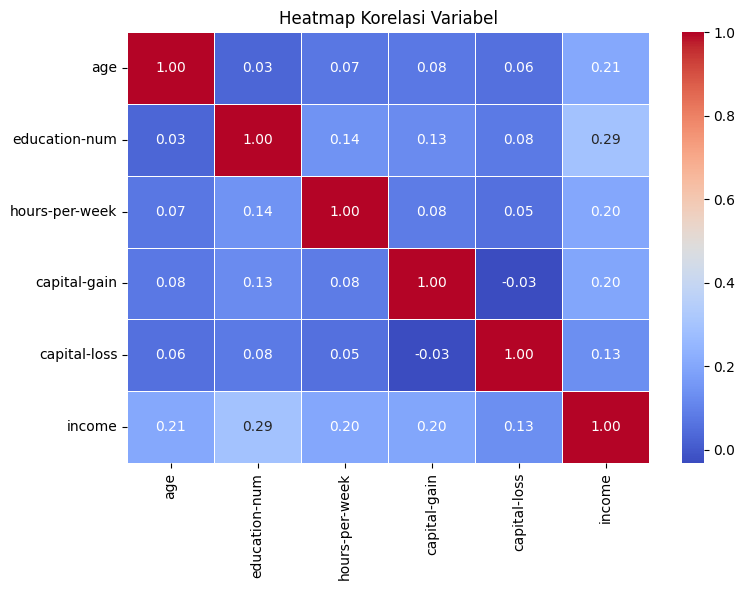

In [23]:
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']

corr_matrix = df[cols].corr(method='pearson')

print("=== Matriks Korelasi ===")
display(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Variabel')
plt.tight_layout()
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini

print("Interpretasi:")
print("-Hasil analisis menunjukkan bahwa education-num memiliki korelasi tertinggi dengan pendapatan (r = 0.33), diikuti oleh usia (r = 0.23), jam kerja per minggu (r = 0.23), dan capital-gain (r = 0.22). Sementara itu, capital-loss memiliki korelasi rendah (r = 0.15). Hal ini mengindikasikan bahwa pendidikan merupakan faktor paling berpengaruh terhadap pendapatan, disusul oleh usia, jam kerja, dan capital-gain.")

Interpretasi:
-Hasil analisis menunjukkan bahwa education-num memiliki korelasi tertinggi dengan pendapatan (r = 0.33), diikuti oleh usia (r = 0.23), jam kerja per minggu (r = 0.23), dan capital-gain (r = 0.22). Sementara itu, capital-loss memiliki korelasi rendah (r = 0.15). Hal ini mengindikasikan bahwa pendidikan merupakan faktor paling berpengaruh terhadap pendapatan, disusul oleh usia, jam kerja, dan capital-gain.


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [25]:
!{sys.executable} -m pip install tensorflow

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


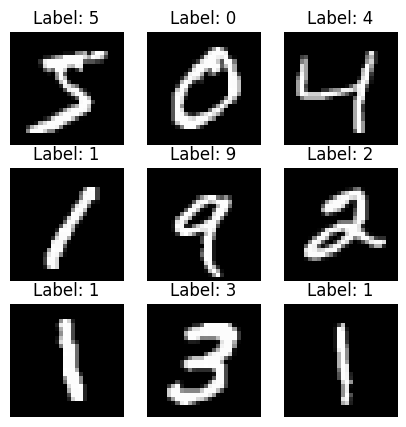

In [27]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Ukuran citra pertama (pixel): (28, 28)
Ukuran asli     : (10000, 28, 28)
Ukuran upsample : (10000, 32, 32)


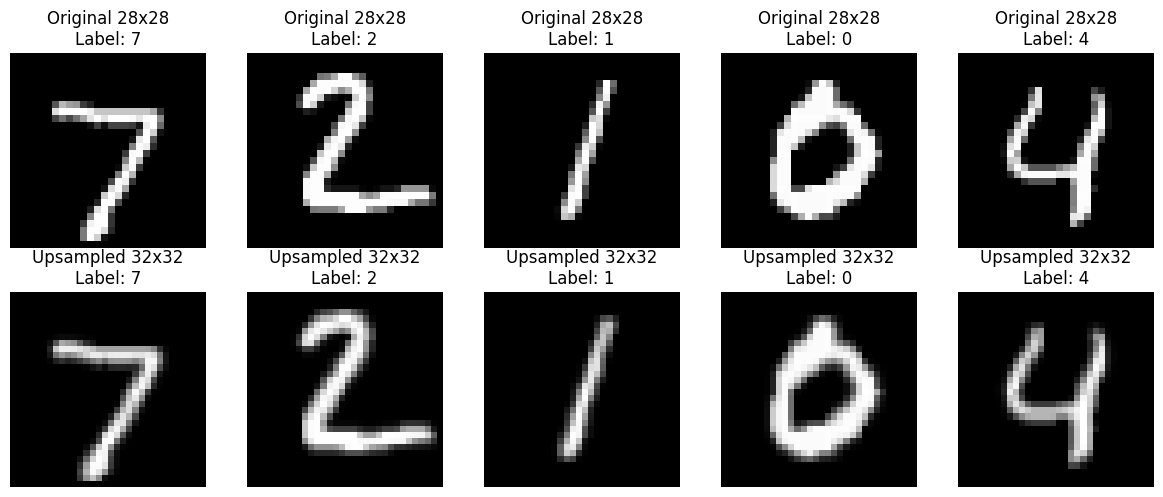

In [28]:
import cv2

print("Ukuran citra pertama (pixel):", X_train[0].shape)

X_test_upsampled = np.zeros((X_test.shape[0], 32, 32))

for i, img in enumerate(X_test):
    X_test_upsampled[i] = cv2.resize(img, (32, 32), interpolation=cv2.INTER_LINEAR)

print(f"Ukuran asli     : {X_test.shape}")
print(f"Ukuran upsample : {X_test_upsampled.shape}")

plt.figure(figsize=(12, 5))
for i in range(5):

    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Original 28x28\nLabel: {y_test[i]}')
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f'Upsampled 32x32\nLabel: {y_test[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Original pixel value range   : 0.00 - 255.00
Normalized pixel value range : 0.00 - 1.00

Statistik sampel:
Mean : 0.1326
Std  : 0.2917


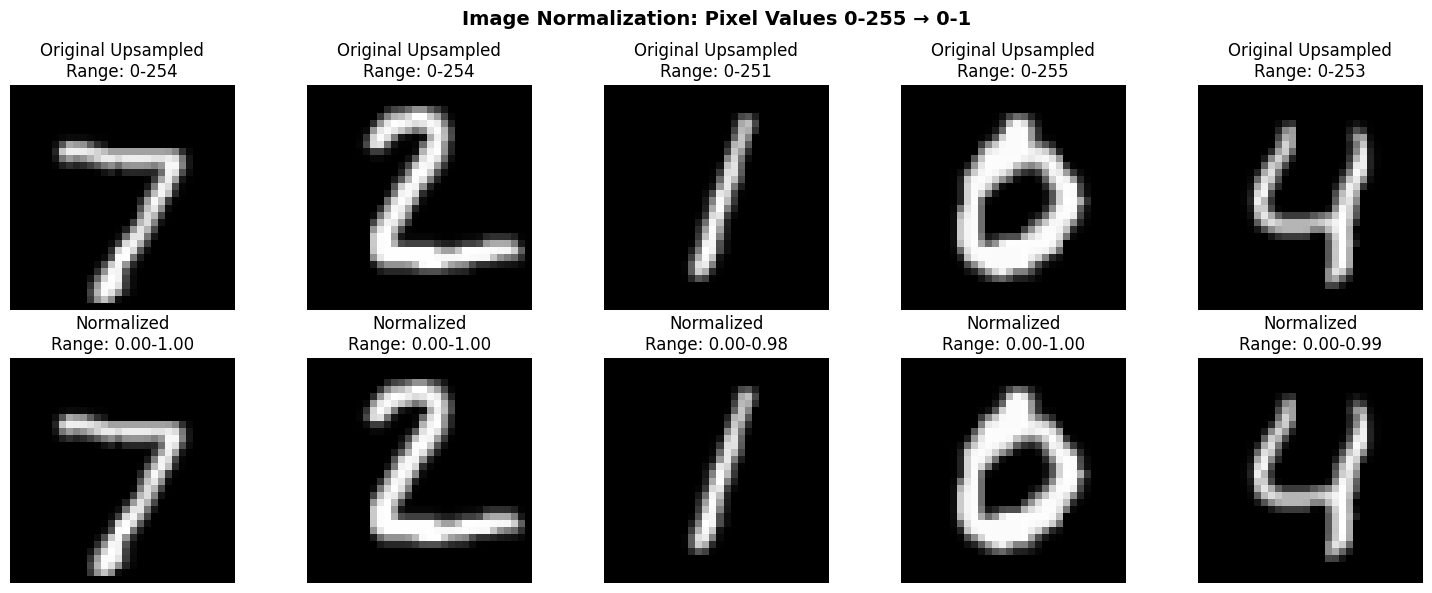

In [29]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_normalized = X_test_upsampled.astype('float32') / 255.0

print(f"Original pixel value range   : {X_test_upsampled.min():.2f} - {X_test_upsampled.max():.2f}")
print(f"Normalized pixel value range : {X_test_normalized.min():.2f} - {X_test_normalized.max():.2f}")

print("\nStatistik sampel:")
print(f"Mean : {X_test_normalized.mean():.4f}")
print(f"Std  : {X_test_normalized.std():.4f}")

plt.figure(figsize=(15, 6))
for i in range(5):

    plt.subplot(2, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f'Original Upsampled\nRange: {X_test_upsampled[i].min():.0f}-{X_test_upsampled[i].max():.0f}')
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(X_test_normalized[i], cmap='gray')
    plt.title(f'Normalized\nRange: {X_test_normalized[i].min():.2f}-{X_test_normalized[i].max():.2f}')
    plt.axis('off')

plt.suptitle('Image Normalization: Pixel Values 0-255 → 0-1', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

=== Informasi Bentuk Data ===
Asli (3D)   : (10000, 32, 32)
Flatten (2D): (10000, 1024)
Fitur per citra : 1024 (32x32 = 1024)
Citra pertama - shape asli : (32, 32)
Citra pertama - shape flatten : (1024,)


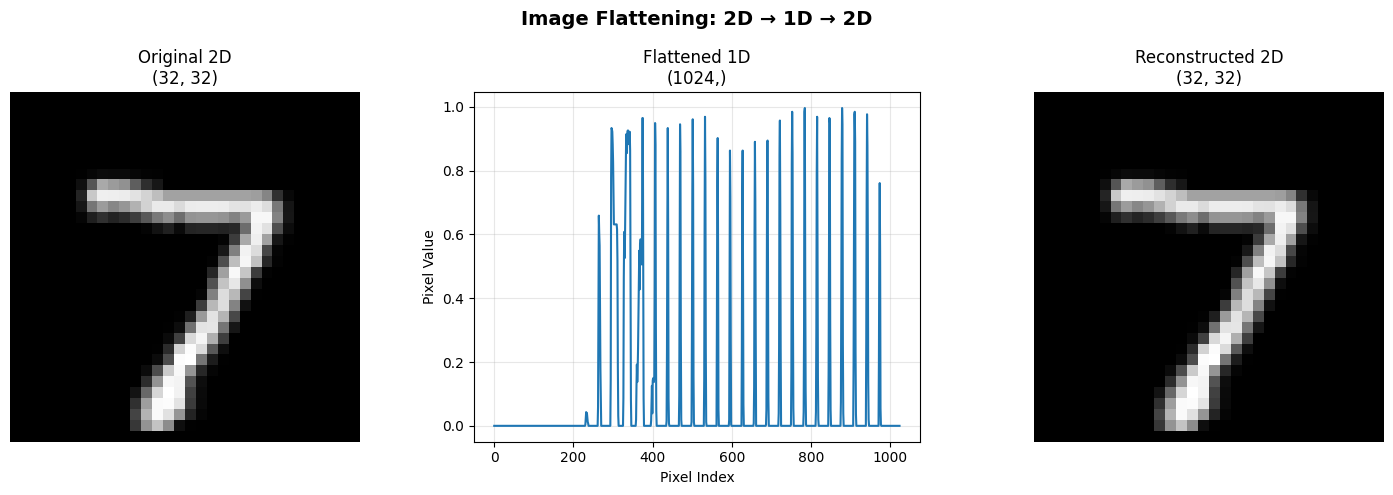

In [30]:

# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

n_samples = X_test_normalized.shape[0]
n_features = 32 * 32
flatten_holder = np.empty((n_samples, n_features), dtype=np.float32)

for idx, image in enumerate(X_test_normalized):
    flatten_holder[idx] = image.ravel()

print("=== Informasi Bentuk Data ===")
print(f"Asli (3D)   : {X_test_normalized.shape}")
print(f"Flatten (2D): {flatten_holder.shape}")
print(f"Fitur per citra : {flatten_holder.shape[1]} (32x32 = {32*32})")
print(f"Citra pertama - shape asli : {X_test_normalized[0].shape}")
print(f"Citra pertama - shape flatten : {flatten_holder[0].shape}")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(X_test_normalized[0], cmap='gray')
axes[0].set_title(f"Original 2D\n{X_test_normalized[0].shape}")
axes[0].axis('off')

axes[1].plot(flatten_holder[0])
axes[1].set_title(f"Flattened 1D\n{flatten_holder[0].shape}")
axes[1].set_xlabel("Pixel Index")
axes[1].set_ylabel("Pixel Value")
axes[1].grid(alpha=0.3)

axes[2].imshow(flatten_holder[0].reshape(32, 32), cmap='gray')
axes[2].set_title(f"Reconstructed 2D\n(32, 32)")
axes[2].axis('off')

fig.suptitle("Image Flattening: 2D → 1D → 2D", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()